In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
path = 'F:/Zindi'
filename = 'Train.csv'

In [3]:
df_train = pd.read_csv(os.path.join(path, filename), sep=',')

In [4]:
#df_train = df_train[df_train['Time from Pickup to Arrival'] > 300]

### Распределение целевой переменной

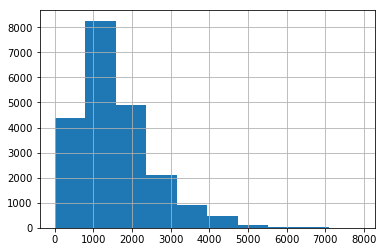

In [5]:
df_train['Time from Pickup to Arrival'].hist()

### Добавим информацию о водителях

In [6]:
df_rider = pd.read_csv(os.path.join(path, 'Riders.csv'), sep=',')

In [7]:
df_rider.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


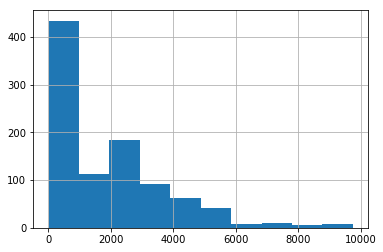

In [8]:
df_rider['No_Of_Orders'].hist()

In [10]:
rider_rating=[]
rider_age=[]
for i,row in df_train.iterrows():
    #print(df_rider[df_rider['Rider Id']==row['Rider Id']].Age.values[0])
    rider_age.append(df_rider[df_rider['Rider Id']==row['Rider Id']].Age.values[0])
    rider_rating.append(df_rider[df_rider['Rider Id']==row['Rider Id']].Average_Rating.values[0])

In [11]:
df_train['Rider_Age'] = rider_age

In [12]:
df_train['Rider_Rating'] = rider_rating

In [13]:
df_train['Time from Pickup to Arrival'] = df_train['Time from Pickup to Arrival']

### Посмотрим как некоторые признаки меняются от дня недели

In [15]:
df_train.groupby(['Placement - Weekday (Mo = 1)']).mean()

,Platform Type,Placement - Day of Month,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,Rider_Age,Rider_Rating
Placement - Weekday (Mo = 1),,,,,,,,,,,,,,,,,,,,
1,2.751913,14.815519,14.815783,1.000264,14.815783,1.000264,14.815783,1.000264,14.815783,1.000264,9.609660,22.979701,1.849000,-1.281633,36.811229,-1.282055,36.811890,1496.081288,997.446820,13.872552
2,2.797929,15.727962,15.728467,2.000505,15.728467,2.000505,15.728467,2.000505,15.728467,2.000505,9.429149,23.059962,15.978488,-1.281179,36.810514,-1.282028,36.810575,1589.976257,974.465774,13.901516
3,2.772953,16.055454,16.055454,3.000000,16.055454,3.000000,16.055454,3.000000,16.055454,3.000000,9.564740,23.435834,4.150000,-1.282067,36.811553,-1.283025,36.811476,1573.379545,1006.192781,13.885875
4,2.772706,15.860218,15.860218,4.000000,15.860218,4.000000,15.860218,4.000000,15.860218,4.000000,9.330653,23.431294,3.955833,-1.280898,36.810597,-1.283054,36.811455,1556.106197,990.041154,13.900781
5,2.746807,15.815177,15.815177,5.000000,15.815177,5.000000,15.815177,5.000000,15.815177,5.000000,9.447032,23.543676,11.165909,-1.280973,36.811235,-1.283402,36.810032,1595.178813,977.305785,13.855622
6,2.565004,15.561733,15.561733,6.000000,15.561733,6.000000,15.561733,6.000000,15.561733,6.000000,9.775143,22.755069,3.594118,-1.284071,36.816316,-1.281416,36.812384,1445.685200,912.206051,13.874734
7,2.236559,15.333333,15.333333,7.000000,15.333333,7.000000,15.333333,7.000000,15.333333,7.000000,11.365591,22.789759,1.766667,-1.278587,36.804521,-1.275205,36.818547,1683.032258,1019.989247,13.825806


In [16]:
df_train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Rider_Age,Rider_Rating
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1309,13.8
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,339,13.6
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,242,12.5
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,283,14.5
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,872,14.1


### Сделаем OHE признаков: Platform Type, Personal or Business, Placement - Day of Month, Placement - Weekday (Mo = 1)

In [17]:
df_train = df_train.merge(pd.get_dummies(df_train['Platform Type'],prefix='platform'), left_index=True, right_index=True)
df_train = df_train.merge(pd.get_dummies(df_train['Personal or Business'],prefix='how'), left_index=True, right_index=True)
df_train = df_train.merge(pd.get_dummies(df_train['Placement - Day of Month'],prefix='day'), left_index=True, right_index=True)
df_train = df_train.merge(pd.get_dummies(df_train['Placement - Weekday (Mo = 1)'],prefix='week'), left_index=True, right_index=True)

In [18]:
df_train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'Rider_Age', 'Rider_Rating',
       'platform_1', 'platform_2', 'platform_3', 'platform_4', 'how_Business',
       'how_Personal', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
      

Возьмем в признаки: 
    возраст и рейтинг водителя
    день недели
    тип устройства, с которого был сделан заказ
    бизнес заказ или нет
    день месяца
    расстояние 
    температуру

In [19]:
X = df_train[['Rider_Age', 'Rider_Rating', 'platform_1', 'platform_2', 'platform_3', 'platform_4', 'how_Business',
       'how_Personal', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20',
       'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27',
       'day_28', 'day_29', 'day_30', 'day_31', 'week_1', 'week_2', 'week_3',
       'week_4', 'week_5', 'week_6', 'week_7','Distance (KM)', 'Temperature']]

In [20]:
y = df_train['Time from Pickup to Arrival']

### Пробуем Xgboost

In [22]:
import xgboost as xgb

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, shuffle=True)

In [25]:
model = xgb.XGBRegressor(max_depth=6)
model.fit(X_train,y_train)
print (model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mean_squared_error(y_pred, y_test)

624006.2275600057

### Формируем предсказание

In [29]:
df_test = pd.read_csv(os.path.join(path, 'Test.csv'), sep=',')

In [30]:
rider_rating_test=[]
rider_age_test=[]
for i,row in df_test.iterrows():
    #print(df_rider[df_rider['Rider Id']==row['Rider Id']].Age.values[0])
    rider_age_test.append(df_rider[df_rider['Rider Id']==row['Rider Id']].Age.values[0])
    rider_rating_test.append(df_rider[df_rider['Rider Id']==row['Rider Id']].Average_Rating.values[0])

In [31]:
df_test['Rider_Age'] = rider_age_test
df_test['Rider_Rating'] = rider_rating_test

In [32]:
df_test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Rider_Age,Rider_Rating
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,1511,13.3
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,273,14.4
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,460,13.1
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,560,13.7
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,1120,14.1


In [33]:
df_test = df_test.merge(pd.get_dummies(df_test['Platform Type'],prefix='platform'), left_index=True, right_index=True)
df_test = df_test.merge(pd.get_dummies(df_test['Personal or Business'],prefix='how'), left_index=True, right_index=True)
df_test = df_test.merge(pd.get_dummies(df_test['Placement - Day of Month'],prefix='day'), left_index=True, right_index=True)
df_test = df_test.merge(pd.get_dummies(df_test['Placement - Weekday (Mo = 1)'],prefix='week'), left_index=True, right_index=True)

In [34]:
df_test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,day_29,day_30,day_31,week_1,week_2,week_3,week_4,week_5,week_6,week_7
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,0,0,0,0,0,1,0,0,0,0
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,0,0,0,0,0,0,0,1,0,0
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,0,0,0,0,0,0,1,0,0,0
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,0,0,0,1,0,0,0,0,0,0
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,0,0,0,0,1,0,0,0,0,0


In [35]:
X_test_total = df_test[['Rider_Age', 'Rider_Rating', 'platform_1', 'platform_2', 'platform_3', 'platform_4', 'how_Business',
       'how_Personal', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20',
       'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27',
       'day_28', 'day_29', 'day_30', 'day_31', 'week_1', 'week_2', 'week_3',
       'week_4', 'week_5', 'week_6', 'week_7','Distance (KM)', 'Temperature']]

In [36]:
y_test_total = model.predict(X_test_total)

In [37]:
with open(os.path.join(path,'submission_XgbRegressor_1_repeat.csv'), 'w') as f:
    f.write('Order_No,Time from Pickup to Arrival\n')
    values=y_test_total
    order=df_test['Order No'].values 
    for i in range(len(order)):
        f.write(str(order[i])+','+str(values[i])+'\n')
f.close()

In [107]:
# score = 781.848824458021 на public LB
# XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
#       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
#       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
#       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#       silent=True, subsample=1)
#['Rider_Age', 'Rider_Rating', 'platform_1', 'platform_2', 'platform_3', 'platform_4', 'how_Business',
#       'how_Personal', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
#       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
#       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20',
#       'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27',
#       'day_28', 'day_29', 'day_30', 'day_31', 'week_1', 'week_2', 'week_3',
#       'week_4', 'week_5', 'week_6', 'week_7','Distance (KM)', 'Temperature']
# без отбраковки каких-либо выбросов